In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import zipfile

# Desafio CIS

> Bloco com recuo



<table>
  <tr>
    <th>Nome</th>
    <td>Hugo Silva de Vasconcelos</td>
  </tr>
  <tr>
    <th>Matrícula</th>
    <td>180102028</td>
  </tr>
  <tr>
    <th>Curso</th>
    <td>Engenharia de Redes</td>
  </tr>
  <tr>
    <th>Email</th>
    <td>180102028@aluno.unb.br</td>
  </tr>
</table>

In [ ]:
local_zip = './datasets.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

# Informações sobre os dados human_freedom.xlsx: https://www.openintro.org/data/index.php?data=hfi

## Questão 1

No dataset human_freedom, existem alguns valores faltantes. Antes de começar a manipular os dados, trate essas informações e descreva sucintamente as alterações feitas;



In [ ]:
df_hf = pd.read_excel('./freedom.xlsx', sheet_name='hfi_cc_2020.csv')

In [ ]:
df_hf.describe()

,year,hf_rank,hf_quartile,pf_ss_disappearances_disap,pf_movement_domestic,pf_movement_foreign,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_rank,ef_government_tax_income,ef_government_tax_payroll,ef_legal_gender,ef_money_currency,ef_regulation_credit_ownership,ef_regulation_credit_interest,ef_regulation_labor_conscription,ef_rank
count,1782.000000,1702.000000,1702.000000,1691.000000,1691.000000,1691.000000,411.000000,1699.000000,1702.000000,1702.000000,1702.000000,1658.000000,1581.000000,1782.000000,1702.000000,1623.000000,1683.000000,1701.000000,1702.000000
mean,2013.000000,77.843126,2.505875,8.474276,7.726198,7.658190,6.416058,6.701001,7.923032,7.314924,77.867215,7.422799,5.431373,0.882716,6.715629,7.600123,9.129531,6.607878,77.801998
std,3.163165,44.984360,1.118347,3.063783,3.540320,3.497796,3.642518,4.685900,4.037808,4.052071,44.972576,2.303813,2.633259,0.144772,4.092577,2.738892,1.647930,4.238580,44.995723
min,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2010.000000,39.000000,2.000000,10.000000,5.000000,5.000000,7.000000,0.000000,10.000000,5.000000,39.000000,6.000000,4.000000,0.800000,5.000000,5.000000,9.000000,3.000000,39.000000
50%,2013.000000,78.000000,3.000000,10.000000,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,78.000000,8.000000,5.000000,0.900000,10.000000,8.000000,10.000000,10.000000,78.000000
75%,2016.000000,116.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,116.000000,10.000000,7.000000,1.000000,10.000000,10.000000,10.000000,10.000000,116.000000
max,2018.000000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,162.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,162.000000


In [ ]:
print("Shape total: ", df_hf.shape)
print("Shape sem valores nulos: ", df_hf[df_hf.isnull().any(axis=1)].shape)

Shape total:  (1782, 112)
Shape sem valores nulos:  (1518, 112)


In [ ]:
# Verificando a quantidade de valores nulos por coluna
df_hf.isnull().sum()[df_hf.isnull().sum() > 0]

hf_score                   80
hf_rank                    80
hf_quartile                80
pf_rol_procedural         655
pf_rol_civil              655
                         ... 
ef_regulation_business     84
ef_regulation              67
ef_score                   80
ef_rank                    80
womens_freedom             80
Length: 103, dtype: int64

In [ ]:
df_hf[['pf_identity_legal', 'pf_association_assembly', 'pf_expression_cable', 'pf_expression_newspapers', 'pf_expression_control', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_ss_disappearances_organized', 'ef_government_tax_payroll']]
df_hf = df_hf.drop(['pf_identity_legal', 'pf_association_assembly', 'pf_expression_cable', 'pf_expression_newspapers', 'pf_expression_control', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_ss_disappearances_organized', 'ef_government_tax_payroll'], axis=1)

In [ ]:
df_hf.isnull().sum()[df_hf.isnull().sum() > 150 ]

ef_government_transfers           162
ef_trade_tariffs_revenue          174
ef_trade_regulatory_nontariff     175
ef_regulation_credit_ownership    159
ef_regulation_labor_firing        200
ef_regulation_labor_bargain       199
ef_regulation_business_adm        198
dtype: int64

In [ ]:
df_hf.fillna(df_hf.mean(), inplace=True)

C:\Users\hugos\AppData\Local\Temp\ipykernel_28364\2191136212.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hf.fillna(df_hf.mean(), inplace=True)


In [ ]:
print("Shape total: ", df_hf.shape)
print("Shape sem valores nulos: ", df_hf[df_hf.isnull().any(axis=1)].shape)

Shape total:  (1782, 102)
Shape sem valores nulos:  (621, 102)


In [ ]:
df_hf.isnull().sum()[df_hf.isnull().sum() > 0]

hf_score                             80
pf_rol                               80
pf_ss_homicide                       80
pf_ss_disappearances_violent         80
pf_ss_disappearances_fatalities      80
                                     ..
ef_regulation_business_compliance    90
ef_regulation_business               84
ef_regulation                        67
ef_score                             80
womens_freedom                       80
Length: 78, dtype: int64

In [ ]:
df_hf[df_hf.isnull().any(axis=1)]

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
6,2012,ALB,Albania,Eastern Europe,7.54,53.000000,2.000000,2021-05-04 00:00:00,2021-08-07 00:00:00,10.000000,...,6.0,2021-06-09 00:00:00,2021-02-05 00:00:00,NaN,6.0,2021-03-06 00:00:00,2021-05-07 00:00:00,7.46,46.000000,8.26
19,2010,DZA,Algeria,Middle East & North Africa,2021-03-05 00:00:00,148.000000,4.000000,2021-04-04 00:00:00,2021-07-09 00:00:00,10.000000,...,2021-03-03 00:00:00,9.0,2021-05-03 00:00:00,2021-03-06 00:00:00,2021-09-04 00:00:00,2021-09-04 00:00:00,2021-02-05 00:00:00,5.13,149.000000,2021-05-05 00:00:00
20,2009,DZA,Algeria,Middle East & North Africa,5.29,136.000000,4.000000,2021-04-04 00:00:00,2021-07-09 00:00:00,10.000000,...,2021-04-04 00:00:00,9.0,2021-05-03 00:00:00,2021-09-06 00:00:00,2021-09-04 00:00:00,2021-01-05 00:00:00,2021-06-05 00:00:00,5.17,137.000000,2021-05-05 00:00:00
21,2008,DZA,Algeria,Middle East & North Africa,5.32,136.000000,4.000000,2021-05-04 00:00:00,2021-06-09 00:00:00,10.000000,...,2021-04-04 00:00:00,9.0,2021-05-03 00:00:00,2021-09-06 00:00:00,2021-09-04 00:00:00,2021-02-05 00:00:00,2021-05-05 00:00:00,5.21,133.000000,2021-05-05 00:00:00
32,2008,AGO,Angola,Sub-Saharan Africa,5.19,138.000000,4.000000,2021-06-03 00:00:00,2021-03-08 00:00:00,5.000000,...,2021-04-04 00:00:00,2021-01-06 00:00:00,2021-04-03 00:00:00,2021-05-04 00:00:00,7.0,2021-01-05 00:00:00,2021-01-05 00:00:00,4.58,138.000000,2021-05-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,2012,YEM,"Yemen,Rep.",Middle East & North Africa,5.17,147.000000,4.000000,2021-03-03 00:00:00,2021-04-07 00:00:00,5.000000,...,0.0,8.0,2021-07-02 00:00:00,2021-08-07 00:00:00,2021-02-07 00:00:00,2021-08-04 00:00:00,2021-03-06 00:00:00,6.49,103.000000,1.86
1756,2011,YEM,"Yemen,Rep.",Middle East & North Africa,2021-01-05 00:00:00,151.000000,4.000000,2021-07-03 00:00:00,2021-07-07 00:00:00,0.000000,...,2021-01-02 00:00:00,8.0,0.0,2021-07-07 00:00:00,2021-02-07 00:00:00,2021-07-04 00:00:00,2021-06-05 00:00:00,6.36,113.000000,1.86
1757,2010,YEM,"Yemen,Rep.",Middle East & North Africa,5.46,146.000000,4.000000,4.0,2021-01-08 00:00:00,0.000000,...,2021-01-02 00:00:00,2021-07-08 00:00:00,2021-04-01 00:00:00,2021-09-08 00:00:00,2021-02-07 00:00:00,2021-02-05 00:00:00,2021-07-05 00:00:00,6.33,110.000000,2021-05-05 00:00:00
1758,2009,YEM,"Yemen,Rep.",Middle East & North Africa,NaN,77.843126,2.505875,NaN,NaN,8.474276,...,NaN,NaN,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,77.801998,NaN


In [ ]:
df_hf[df_hf['year'] == 2018]

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,5.0,2021-01-09 00:00:00,10.0,...,2021-07-06 00:00:00,2021-07-09 00:00:00,2021-04-05 00:00:00,2021-06-05 00:00:00,2021-02-07 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-08-07 00:00:00,26.0,9.26
11,2018,DZA,Algeria,Middle East & North Africa,2021-02-05 00:00:00,154.0,4.0,2021-01-05 00:00:00,2021-05-09 00:00:00,10.0,...,2021-04-02 00:00:00,2021-03-09 00:00:00,2021-09-03 00:00:00,2021-08-08 00:00:00,7.0,2021-09-05 00:00:00,2021-06-05 00:00:00,4.97,157.0,2021-05-03 00:00:00
22,2018,AGO,Angola,Sub-Saharan Africa,5.48,144.0,4.0,2021-06-03 00:00:00,2021-01-08 00:00:00,10.0,...,2021-04-02 00:00:00,2021-07-08 00:00:00,5.0,2021-09-07 00:00:00,2021-08-06 00:00:00,2021-06-05 00:00:00,2021-04-05 00:00:00,4.75,159.0,2021-05-08 00:00:00
33,2018,ARG,Argentina,Latin America & the Caribbean,2021-05-07 00:00:00,70.0,2.0,2021-07-05 00:00:00,2021-09-07 00:00:00,5.0,...,2021-07-06 00:00:00,2021-06-09 00:00:00,2021-02-07 00:00:00,2021-07-05 00:00:00,2021-05-06 00:00:00,2021-04-06 00:00:00,2021-08-05 00:00:00,5.78,144.0,10.0
44,2018,ARM,Armenia,Caucasus & Central Asia,7.69,47.0,2.0,2021-09-04 00:00:00,2021-03-09 00:00:00,10.0,...,6.0,2021-09-09 00:00:00,2021-03-06 00:00:00,2021-03-09 00:00:00,7.0,2021-03-07 00:00:00,2021-08-07 00:00:00,7.92,18.0,9.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,2018,VEN,Venezuela,Latin America & the Caribbean,2021-08-04 00:00:00,160.0,4.0,2021-07-01 00:00:00,0.0,10.0,...,0.0,2021-04-04 00:00:00,2021-02-01 00:00:00,5.0,0.0,2.0,2021-05-02 00:00:00,3.34,162.0,10.0
1738,2018,VNM,Vietnam,South Asia,6.25,121.0,3.0,2021-06-04 00:00:00,2021-04-09 00:00:00,10.0,...,2021-02-06 00:00:00,2021-04-09 00:00:00,5.0,2021-02-08 00:00:00,2021-07-05 00:00:00,2021-04-06 00:00:00,2021-09-06 00:00:00,2021-02-06 00:00:00,125.0,9.26
1749,2018,YEM,"Yemen,Rep.",Middle East & North Africa,4.17,159.0,4.0,2021-02-02 00:00:00,2021-03-07 00:00:00,0.0,...,0.0,2021-03-08 00:00:00,0.5,NaN,2021-02-07 00:00:00,2021-08-03 00:00:00,2021-03-04 00:00:00,5.51,149.0,2.46
1760,2018,ZMB,Zambia,Sub-Saharan Africa,6.71,96.0,3.0,4.0,2021-09-07 00:00:00,10.0,...,2021-08-03 00:00:00,2021-04-09 00:00:00,2021-08-04 00:00:00,2021-08-07 00:00:00,2021-02-08 00:00:00,2021-04-06 00:00:00,2021-05-06 00:00:00,7.19,69.0,5.0


# Questão 2
Calcule o número total de medalhas recebido por cada país e adicione essa coluna no dataset;

Resposta: A coluna Total já existia previamente no Dataset, utilizei o espaço para preparar os dados para as questões seguintes.

In [ ]:
medals_df = pd.read_excel('./medals.xlsx')
#Removendo coluna Unnamed: 6 que não possui dados
medals_df.drop(['Unnamed: 6'], axis=1, inplace=True)
medals_df.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,UnitedStates,39,41,33,113,1
1,China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,UnitedKingdom,22,21,22,65,4
4,Russia,20,28,23,71,3


In [ ]:
def try_convert_to_int(value):
    try:
        return int(value)
    except:
        return 0

In [ ]:
# Transformando atributos não numéricos das colunas 'Gold Medal', 'Silver Medal' e 'Bronze Medal' em 0
medals_df['Gold Medal'] = medals_df['Gold Medal'].apply(try_convert_to_int)
medals_df['Silver Medal'] = medals_df['Silver Medal'].apply(try_convert_to_int)
medals_df['Bronze Medal'] = medals_df['Bronze Medal'].apply(try_convert_to_int)


medals_df.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,UnitedStates,39,41,33,113,1
1,China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,UnitedKingdom,22,21,22,65,4
4,Russia,20,28,23,71,3


# Questão 3
Seguindo as regras oficiais das Olimpíadas, obtenha o ranking dos países. Visualize, também, os dez melhores países com base no total de medalhas;

In [ ]:
medals_df = medals_df.sort_values(by=['Gold Medal','Silver Medal', 'Bronze Medal'], ascending=False)
medals_df.head(10)
# Criando coluna Rank_Official com base na ordem de medalhas
medals_df['Rank_Official'] = medals_df.reset_index().index + 1

In [ ]:
medals_df.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Rank_Official
0,UnitedStates,39,41,33,113,1,1
1,China,38,32,18,88,2,2
2,Japan,27,14,17,58,5,3
3,UnitedKingdom,22,21,22,65,4,4
4,Russia,20,28,23,71,3,5
5,Australia,17,7,22,46,6,6
6,Netherlands,10,12,14,36,9,7
7,France,10,12,11,33,10,8
8,Germany,10,11,16,37,8,9
9,Italy,10,10,20,40,7,10


# Questão 4
Obtenha a média de alfabetização por região e a represente graficamente;

In [ ]:
df_geral = pd.read_excel('./geral.xlsx')
df_geral.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,AmericanSamoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
# Media de alfabetização por região
df_geral.groupby('Region')['Literacy (%)'].mean()

Region
ASIA (EX. NEAR EAST)                   79.553571
BALTICS                                99.733333
C.W. OF IND. STATES                    98.725000
EASTERN EUROPE                         97.088889
LATIN AMER. & CARIB                    90.654545
NEAR EAST                              79.521429
NORTHERN AFRICA                        67.240000
NORTHERN AMERICA                       97.750000
OCEANIA                                88.835294
SUB-SAHARAN AFRICA                     62.510000
WESTERN EUROPE                         98.391304
Name: Literacy (%), dtype: float64

<Axes: title={'center': 'Média de alfabetização por região'}, xlabel='Region'>

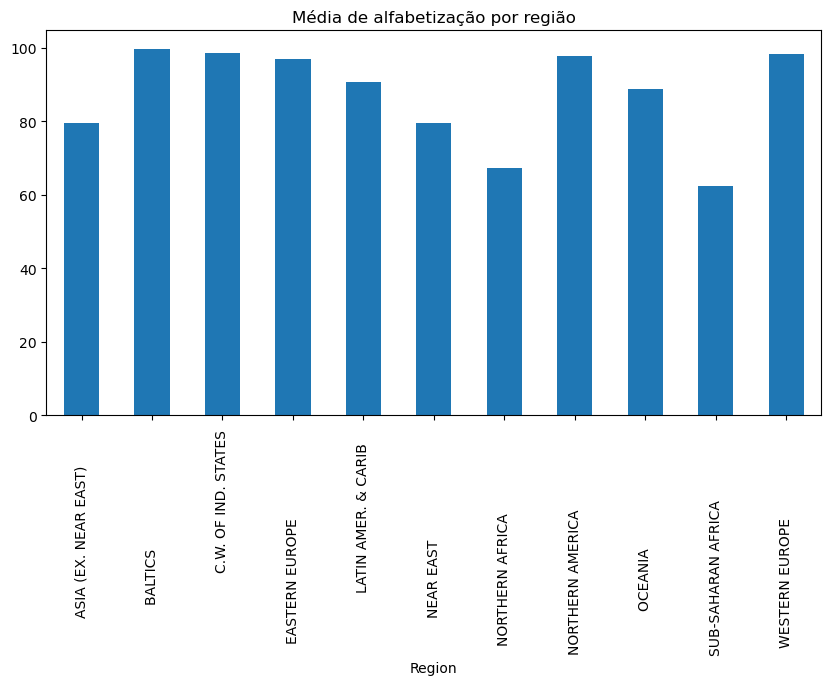

In [ ]:
df_geral.groupby('Region')['Literacy (%)'].mean().plot(kind='bar', figsize=(10,5), title='Média de alfabetização por região')

# Questão 5
Liste os cinco países com maior número de celulares a cada mil
habitantes. Faça uma representação gráfica;

In [ ]:
df_geral.sort_values(by=['Phones (per 1000)'], ascending=False).head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,99.0,1035.6,0.00,0.00,100.00,NaN,9.19,12.91,0.17,NaN,NaN
214,UnitedStates,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.01,0.204,0.787
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.01,0.100,0.890
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.03,0.100,0.870


<Axes: title={'center': 'Top 5 países com maior número de celulares por 1000 pessoas'}, xlabel='Country'>

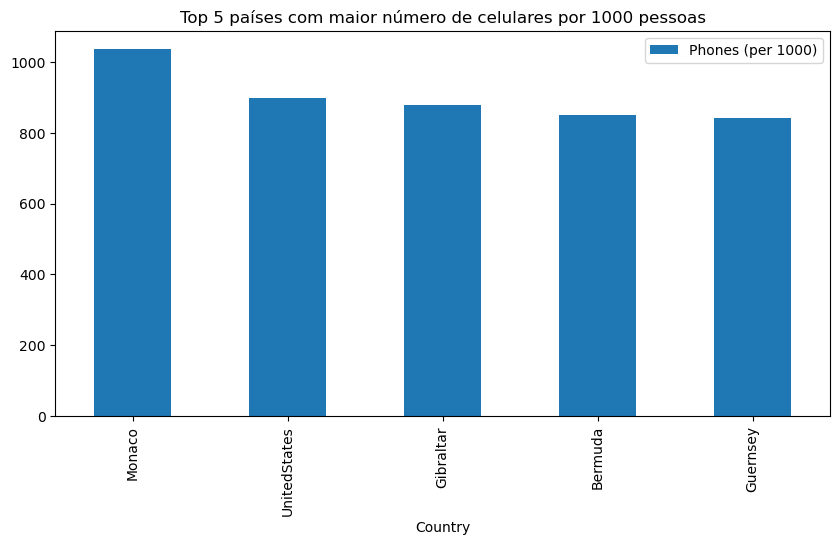

In [ ]:
# Plot do top 5 países com maior número de celulares por 1000 pessoas
df_geral.sort_values(by=['Phones (per 1000)'], ascending=False).head(5).plot(kind='bar', x='Country', y='Phones (per 1000)', figsize=(10,5), title='Top 5 países com maior número de celulares por 1000 pessoas')

# Questão 6
Obtenha os dados do dataset human_freedom apenas para o ano de
2018;

In [ ]:
# Obtendo os dados da dataset human freedom e filtrando pelo ano de 2018
df_hf[df_hf['year'] == 2018]

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,5.0,2021-01-09 00:00:00,10.0,...,2021-07-06 00:00:00,2021-07-09 00:00:00,2021-04-05 00:00:00,2021-06-05 00:00:00,2021-02-07 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-08-07 00:00:00,26.0,9.26
11,2018,DZA,Algeria,Middle East & North Africa,2021-02-05 00:00:00,154.0,4.0,2021-01-05 00:00:00,2021-05-09 00:00:00,10.0,...,2021-04-02 00:00:00,2021-03-09 00:00:00,2021-09-03 00:00:00,2021-08-08 00:00:00,7.0,2021-09-05 00:00:00,2021-06-05 00:00:00,4.97,157.0,2021-05-03 00:00:00
22,2018,AGO,Angola,Sub-Saharan Africa,5.48,144.0,4.0,2021-06-03 00:00:00,2021-01-08 00:00:00,10.0,...,2021-04-02 00:00:00,2021-07-08 00:00:00,5.0,2021-09-07 00:00:00,2021-08-06 00:00:00,2021-06-05 00:00:00,2021-04-05 00:00:00,4.75,159.0,2021-05-08 00:00:00
33,2018,ARG,Argentina,Latin America & the Caribbean,2021-05-07 00:00:00,70.0,2.0,2021-07-05 00:00:00,2021-09-07 00:00:00,5.0,...,2021-07-06 00:00:00,2021-06-09 00:00:00,2021-02-07 00:00:00,2021-07-05 00:00:00,2021-05-06 00:00:00,2021-04-06 00:00:00,2021-08-05 00:00:00,5.78,144.0,10.0
44,2018,ARM,Armenia,Caucasus & Central Asia,7.69,47.0,2.0,2021-09-04 00:00:00,2021-03-09 00:00:00,10.0,...,6.0,2021-09-09 00:00:00,2021-03-06 00:00:00,2021-03-09 00:00:00,7.0,2021-03-07 00:00:00,2021-08-07 00:00:00,7.92,18.0,9.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,2018,VEN,Venezuela,Latin America & the Caribbean,2021-08-04 00:00:00,160.0,4.0,2021-07-01 00:00:00,0.0,10.0,...,0.0,2021-04-04 00:00:00,2021-02-01 00:00:00,5.0,0.0,2.0,2021-05-02 00:00:00,3.34,162.0,10.0
1738,2018,VNM,Vietnam,South Asia,6.25,121.0,3.0,2021-06-04 00:00:00,2021-04-09 00:00:00,10.0,...,2021-02-06 00:00:00,2021-04-09 00:00:00,5.0,2021-02-08 00:00:00,2021-07-05 00:00:00,2021-04-06 00:00:00,2021-09-06 00:00:00,2021-02-06 00:00:00,125.0,9.26
1749,2018,YEM,"Yemen,Rep.",Middle East & North Africa,4.17,159.0,4.0,2021-02-02 00:00:00,2021-03-07 00:00:00,0.0,...,0.0,2021-03-08 00:00:00,0.5,NaN,2021-02-07 00:00:00,2021-08-03 00:00:00,2021-03-04 00:00:00,5.51,149.0,2.46
1760,2018,ZMB,Zambia,Sub-Saharan Africa,6.71,96.0,3.0,4.0,2021-09-07 00:00:00,10.0,...,2021-08-03 00:00:00,2021-04-09 00:00:00,2021-08-04 00:00:00,2021-08-07 00:00:00,2021-02-08 00:00:00,2021-04-06 00:00:00,2021-05-06 00:00:00,7.19,69.0,5.0


# Questão 7
Mostre a evolução do hf_score (human freedom score) do Brasil em
função do tempo;

In [ ]:
# Criando um sub Dataframe com os dados do Brasil
df_hf_Brasil = df_hf[df_hf['countries'] == 'Brazil']

def convert_values(value):
    try:
        return float(value)
    except:
        return 0
df_hf_Brasil['hf_score'] = df_hf_Brasil['hf_score'].apply(convert_values)

C:\Users\hugos\AppData\Local\Temp\ipykernel_28364\1906607743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hf_Brasil['hf_score'] = df_hf_Brasil['hf_score'].apply(convert_values)


In [ ]:
# Encontra o valor 0
df_hf_Brasil[df_hf_Brasil['hf_score'] == 0]
df_hf_Brasil[df_hf_Brasil['year'] == 2012]

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
226,2012,BRA,Brazil,Latin America & the Caribbean,0.0,68.0,2.0,2021-08-04 00:00:00,0.0,10.0,...,2021-04-04 00:00:00,2021-06-06 00:00:00,2021-06-06 00:00:00,2021-09-04 00:00:00,0.0,2021-01-04 00:00:00,2021-02-05 00:00:00,6.63,95.0,9.26


In [ ]:
# Trocando valor 0 pela mediana da coluna
print("Média: ", df_hf_Brasil['hf_score'].median())
df_hf_Brasil['hf_score'] = df_hf_Brasil['hf_score'].replace(0, df_hf_Brasil['hf_score'].median())


Média:  6.93


C:\Users\hugos\AppData\Local\Temp\ipykernel_28364\3500742681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hf_Brasil['hf_score'] = df_hf_Brasil['hf_score'].replace(0, df_hf_Brasil['hf_score'].median())


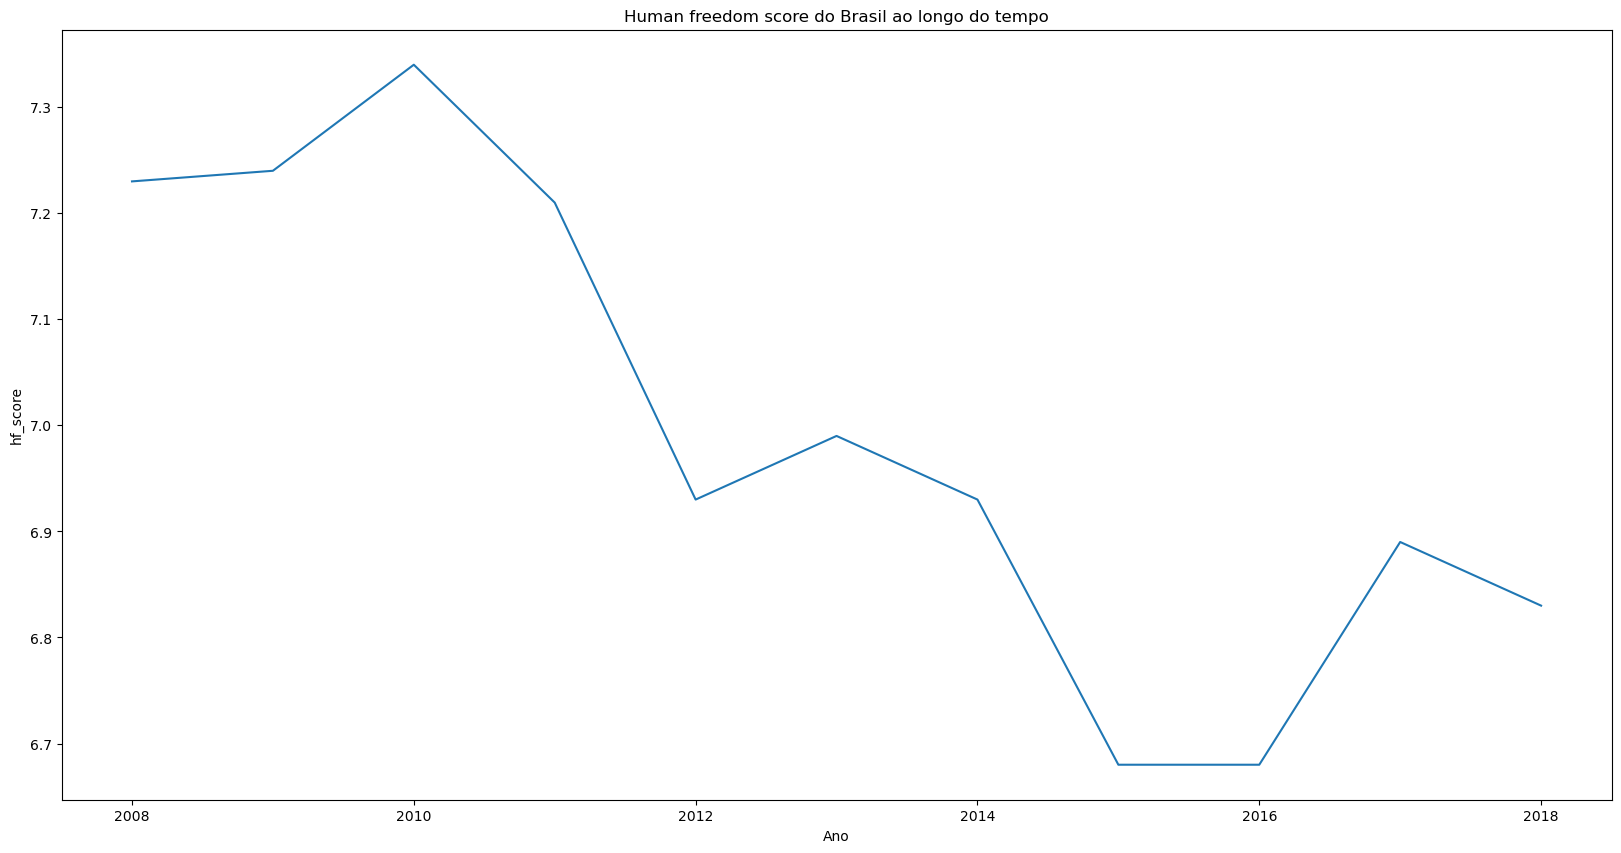

In [ ]:
# Plot do 'hf_score' do pais Brasil ao longo do tempo com x sendo o ano e y sendo o hf_score
plt.figure(figsize=(20,10))
plt.plot(df_hf_Brasil['year'], df_hf_Brasil['hf_score'])
plt.xlabel('Ano')
plt.ylabel('hf_score')
plt.title('Human freedom score do Brasil ao longo do tempo')
plt.show()

# Questão 8
Mostre qual é a região com a maior média populacional;

In [ ]:
# Agrpando por região e calculando a média populacional
regioes_por_media_populacional = df_geral.groupby('Region')['Population'].mean().sort_values(ascending=False)
regioes_por_media_populacional

Region
ASIA (EX. NEAR EAST)                   1.317137e+08
NORTHERN AMERICA                       6.633446e+07
NORTHERN AFRICA                        2.690119e+07
C.W. OF IND. STATES                    2.334013e+07
SUB-SAHARAN AFRICA                     1.469484e+07
WESTERN EUROPE                         1.415500e+07
LATIN AMER. & CARIB                    1.248499e+07
NEAR EAST                              1.219177e+07
EASTERN EUROPE                         9.992893e+06
BALTICS                                2.394991e+06
OCEANIA                                1.577698e+06
Name: Population, dtype: float64

In [ ]:
regioes_por_media_populacional[regioes_por_media_populacional == regioes_por_media_populacional.max()]

Region
ASIA (EX. NEAR EAST)             1.317137e+08
Name: Population, dtype: float64

# Questão 9
Com base na análise dos dados, é possível afirmar que países com maior população tendem a ter mais pessoas saindo ou entrando no país (maior fluxo migratório)?

Resposta: Não, pois tendo em vista a comparação de dados abaixo observa-se que há baixa correlação dos parâmetros população e net migration. Visualmente també identifica-se que não há uma relação entre os parâmetros, pois dentre o top 10 de países com maior população, não há nenhum entre os 10 com maior net migration.

In [ ]:
# Correlação de população e net migration
df_geral[['Population', 'Net migration']].corr()

,Population,Net migration
Population,1.000000,0.000011
Net migration,0.000011,1.000000


In [ ]:
df_geral.sort_values(by=['Population'], ascending=False).head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538
214,UnitedStates,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516
156,Pakistan,ASIA (EX. NEAR EAST),165803560,803940,206.2,0.13,-2.77,72.44,2100.0,45.7,31.8,27.87,0.87,71.26,1.0,29.74,8.23,0.216,0.251,0.533
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,7.3,62.11,3.07,34.82,2.0,29.80,8.27,0.199,0.198,0.603
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575
152,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,99.0,461.2,12.19,0.96,86.85,3.0,9.37,9.16,0.017,0.258,0.725


In [ ]:
df_geral.sort_values(by=['Net migration'], ascending=False).head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
38,CaymanIslands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
166,Qatar,NEAR EAST,885359,11437,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,1.0,15.56,4.72,0.002,0.801,0.197
111,Kuwait,NEAR EAST,2418393,17820,135.7,2.80,14.18,9.95,19000.0,83.5,211.0,0.73,0.11,99.16,1.0,21.94,2.41,0.004,0.479,0.516
208,Turks&CaicosIs,LATIN AMER. & CARIB,21152,430,49.2,90.47,11.68,15.67,9600.0,98.0,269.5,2.33,0.00,97.67,2.0,21.84,4.21,NaN,NaN,NaN
184,Singapore,ASIA (EX. NEAR EAST),4492150,693,6482.2,27.85,11.53,2.29,23700.0,92.5,411.4,1.64,0.00,98.36,2.0,9.34,4.28,0.000,0.339,0.661
177,SanMarino,WESTERN EUROPE,29251,61,479.5,0.00,10.98,5.73,34600.0,96.0,704.3,16.67,0.00,83.33,NaN,10.02,8.17,NaN,NaN,NaN
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
28,BritishVirginIs.,LATIN AMER. & CARIB,23098,153,151.0,52.29,10.01,18.05,16000.0,97.8,506.5,20.00,6.67,73.33,2.0,14.89,4.42,0.018,0.062,0.920
153,N.MarianaIslands,OCEANIA,82459,477,172.9,310.69,9.61,7.11,12500.0,97.0,254.7,13.04,4.35,82.61,2.0,19.43,2.29,NaN,NaN,NaN


# Questão 10
Caso o número de medalhas de bronze e de ouro fossem trocadas, qual seria o ranking dos países?

Resposta: Observou-se que a colocação dos 6 primeiros países não se alteraram devido à quantidade de medalhas de ouro, contudo os países Italia, Alemanha, Holanda e Países Baixos se alternaram de posição.

In [ ]:
medals_df.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Rank_Official
0,UnitedStates,39,41,33,113,1,1
1,China,38,32,18,88,2,2
2,Japan,27,14,17,58,5,3
3,UnitedKingdom,22,21,22,65,4,4
4,Russia,20,28,23,71,3,5
5,Australia,17,7,22,46,6,6
6,Netherlands,10,12,14,36,9,7
7,France,10,12,11,33,10,8
8,Germany,10,11,16,37,8,9
9,Italy,10,10,20,40,7,10


In [ ]:
# Criando novo dataset com os valores de Bronze Medal no lugar de Silver Medal e vicer-versa
medals_df_2 = medals_df.copy()
medals_df_2['Silver Medal'] = medals_df['Bronze Medal']
medals_df_2['Bronze Medal'] = medals_df['Silver Medal']
medals_df_2.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Rank_Official
0,UnitedStates,39,33,41,113,1,1
1,China,38,18,32,88,2,2
2,Japan,27,17,14,58,5,3
3,UnitedKingdom,22,22,21,65,4,4
4,Russia,20,23,28,71,3,5
5,Australia,17,22,7,46,6,6
6,Netherlands,10,14,12,36,9,7
7,France,10,11,12,33,10,8
8,Germany,10,16,11,37,8,9
9,Italy,10,20,10,40,7,10


In [ ]:
medals_df_2 = medals_df_2.sort_values(by=['Gold Medal','Silver Medal', 'Bronze Medal'], ascending=False)
medals_df_2.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Rank_Official
0,UnitedStates,39,33,41,113,1,1
1,China,38,18,32,88,2,2
2,Japan,27,17,14,58,5,3
3,UnitedKingdom,22,22,21,65,4,4
4,Russia,20,23,28,71,3,5
5,Australia,17,22,7,46,6,6
9,Italy,10,20,10,40,7,10
8,Germany,10,16,11,37,8,9
6,Netherlands,10,14,12,36,9,7
7,France,10,11,12,33,10,8


# Questão 11
Normalize os valores dos datasets;

Observação: criou-se a função normalize_df para auxiliar na execução da normalização verificando se os valores são numéricos e aplicando a normalização.

In [ ]:
def normalize_df(df):
    df_copy = df.copy()
    for column in df.columns:
        if df_copy[column].dtype == 'int64' or df_copy[column].dtype == 'float64':
            df_copy[column] = (df_copy[column] - df_copy[column].min()) / (df_copy[column].max() - df_copy[column].min())
    return df_copy

medals_df_norm = normalize_df(medals_df)
medals_df_norm.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Rank_Official
0,UnitedStates,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
1,China,0.974359,0.780488,0.545455,0.776786,0.013158,0.010870
2,Japan,0.692308,0.341463,0.515152,0.508929,0.052632,0.021739
3,UnitedKingdom,0.564103,0.512195,0.666667,0.571429,0.039474,0.032609
4,Russia,0.512821,0.682927,0.696970,0.625000,0.026316,0.043478
5,Australia,0.435897,0.170732,0.666667,0.401786,0.065789,0.054348
6,Netherlands,0.256410,0.292683,0.424242,0.312500,0.105263,0.065217
7,France,0.256410,0.292683,0.333333,0.285714,0.118421,0.076087
8,Germany,0.256410,0.268293,0.484848,0.321429,0.092105,0.086957
9,Italy,0.256410,0.243902,0.606061,0.348214,0.078947,0.097826


In [ ]:
df_geral_norm = normalize_df(df_geral)
df_geral_norm.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,0.002897,0.195299,0.004341,0.814759,0.000000,0.904926,0.657559,0.494148,0.248307,0.356502
1,Albania,EASTERN EUROPE,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,0.068573,0.339559,0.087214,0.617369,0.666667,0.180018,0.106740,0.301691,0.189616,0.579596
2,Algeria,NORTHERN AFRICA,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,0.075237,0.051844,0.004933,0.947953,0.000000,0.226750,0.084517,0.131339,0.654628,0.264574
3,AmericanSamoa,OCEANIA,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,0.250435,0.161005,0.295975,0.625019,0.333333,0.349217,0.035701,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,0.480008,0.035743,0.000000,0.966702,0.666667,0.032689,0.144262,NaN,NaN,NaN


In [ ]:
df_hf_norm = normalize_df(df_hf)
df_hf_norm.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,1.0,ALB,Albania,Eastern Europe,7.81,0.260870,0.333333,5.0,2021-01-09 00:00:00,1.0,...,2021-07-06 00:00:00,2021-07-09 00:00:00,2021-04-05 00:00:00,2021-06-05 00:00:00,2021-02-07 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-08-07 00:00:00,0.155280,9.26
1,0.9,ALB,Albania,Eastern Europe,7.78,0.267081,0.333333,2021-03-05 00:00:00,2021-01-09 00:00:00,1.0,...,2021-07-06 00:00:00,2021-07-09 00:00:00,6.0,6.0,2021-02-07 00:00:00,7.0,2021-09-07 00:00:00,2021-07-07 00:00:00,0.217391,9.26
2,0.8,ALB,Albania,Eastern Europe,7.63,0.304348,0.333333,2021-03-05 00:00:00,2021-06-08 00:00:00,1.0,...,6.0,2021-07-09 00:00:00,6.0,2021-03-07 00:00:00,2021-01-07 00:00:00,7.0,2021-06-07 00:00:00,7.69,0.217391,2021-05-07 00:00:00
3,0.7,ALB,Albania,Eastern Europe,7.55,0.316770,0.333333,2021-02-05 00:00:00,2021-09-08 00:00:00,1.0,...,6.0,2021-07-09 00:00:00,6.0,2021-03-07 00:00:00,2021-01-07 00:00:00,7.0,2021-07-07 00:00:00,2021-07-07 00:00:00,0.204969,2021-05-07 00:00:00
4,0.6,ALB,Albania,Eastern Europe,7.65,0.291925,0.333333,5.0,2021-04-08 00:00:00,1.0,...,6.0,2021-07-09 00:00:00,6.0,2021-02-07 00:00:00,6.0,2021-08-06 00:00:00,2021-08-07 00:00:00,7.65,0.223602,2021-05-07 00:00:00


# Questão 12
É possível observar correlação entre os índices de natalidade e de mortalidade? Justifique o resultado encontrado;

Resposta: Observa-se que apesar de pouca correlação numérica, o plot dos dados mostra que pode haver uma relação entre os parâmetros, há um padrão na distribuição que poderia ser traçado por uma regressão linear.

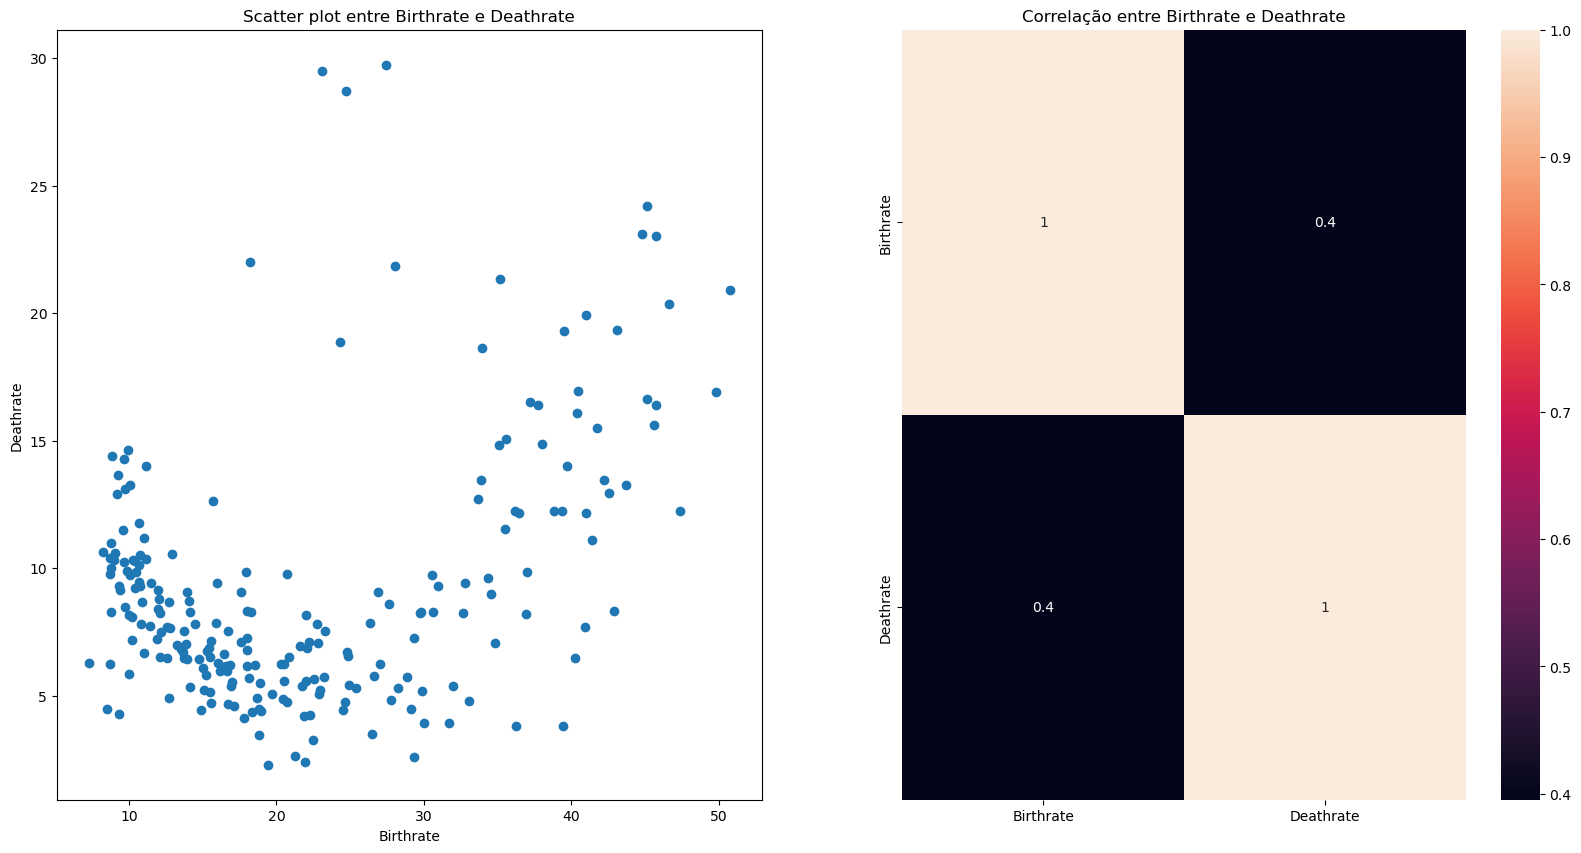

In [ ]:
# Scatter Plot entre entre Birthrate e Deathrate e Plot da Correlação entre ambos
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(df_geral['Birthrate'], df_geral['Deathrate'])
plt.xlabel('Birthrate')
plt.ylabel('Deathrate')
plt.title('Scatter plot entre Birthrate e Deathrate')
plt.subplot(1,2,2)
plt.title('Correlação entre Birthrate e Deathrate')
sns.heatmap(df_geral[['Birthrate', 'Deathrate']].corr(), annot=True)
plt.show()


# Questão 13
É possível observar correlação entre a generosidade da população e o índice de agricultura dos países? Justifique o resultado encontrado;

Observação: Para facilitar a análise dos dados foram agrupadas as colunas generosidade do data frame happness e agricultura do data frame geral por país.

Resposta: Com uma correlação de 0.2 indica-se uma fraca correlação entre estes parâmetros.

In [ ]:
df_hapiness = pd.read_excel('./hapiness.xlsx')
df_hapiness.head()

,Overall rank,Countryorregion,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7769,1340,1587,986,596,153,393
1,2,Denmark,7600,1383,1573,996,592,252,410
2,3,Norway,7554,1488,1582,1028,603,271,341
3,4,Iceland,7494,1380,1624,1026,591,354,118
4,5,Netherlands,7488,1396,1522,999,557,322,298


In [ ]:
# Agrupando dados de df_hapiness[[Generosity]] e df_geral[[Agriculture]] em um único dataset
df_hapiness_agriculture = pd.merge(df_hapiness[['Countryorregion', 'Generosity']], df_geral[['Country', 'Agriculture']], left_on='Countryorregion', right_on='Country')
df_hapiness_agriculture


,Countryorregion,Generosity,Country,Agriculture
0,Finland,153,Finland,0.028
1,Denmark,252,Denmark,0.018
2,Norway,271,Norway,0.021
3,Iceland,354,Iceland,0.086
4,Netherlands,322,Netherlands,0.021
...,...,...,...,...
138,Malawi,218,Malawi,0.342
139,Yemen,108,Yemen,0.135
140,Rwanda,217,Rwanda,0.401
141,Tanzania,276,Tanzania,0.432


             Generosity  Agriculture
Generosity     1.000000     0.203432
Agriculture    0.203432     1.000000


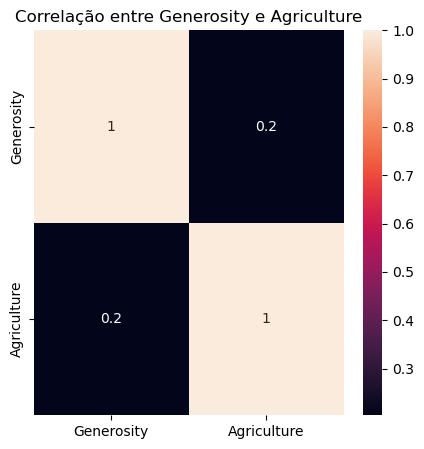

In [ ]:
print(df_hapiness_agriculture[['Generosity', 'Agriculture']].corr())
# Plot da Correlação entre Generosity e Agriculture
plt.figure(figsize=(5,5))
plt.title('Correlação entre Generosity e Agriculture')
sns.heatmap(df_hapiness_agriculture[['Generosity', 'Agriculture']].corr(), annot=True)
plt.show()

# Questão 14
Monte grupos de forma similar a é feito na Copa do Mundo, isto é, um
forte, dois intermediários e um fraco (deixe claro o parâmetro utilizado
para definir as categorias);

# Questão 15
Qual país apresentou maior aumento na taxa de homicídios ao longo do tempo?

Resposta: Os países que apresentaram maior aumento de homicídios foram: Iraq e Senegal. Ambos alcançando o topo no índice de homicídios em 2018. Contudo, o Iraq é o que apresentou crescimento mais acentuado.

In [ ]:
df_hf = pd.read_excel('./freedom.xlsx')

In [ ]:
df_hf.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,2021-08-04 00:00:00,2021-03-04 00:00:00,...,2021-07-06 00:00:00,2021-07-09 00:00:00,2021-04-05 00:00:00,2021-06-05 00:00:00,2021-02-07 00:00:00,2021-07-06 00:00:00,2021-07-07 00:00:00,2021-08-07 00:00:00,26.0,9.26
1,2017,ALB,Albania,Eastern Europe,7.78,44.0,2.0,2021-03-06 00:00:00,2021-04-04 00:00:00,2021-07-04 00:00:00,...,2021-07-06 00:00:00,2021-07-09 00:00:00,6.0,6.0,2021-02-07 00:00:00,7.0,2021-09-07 00:00:00,2021-07-07 00:00:00,36.0,9.26
2,2016,ALB,Albania,Eastern Europe,7.63,50.0,2.0,2021-07-06 00:00:00,2021-05-04 00:00:00,2021-07-04 00:00:00,...,6.0,2021-07-09 00:00:00,6.0,2021-03-07 00:00:00,2021-01-07 00:00:00,7.0,2021-06-07 00:00:00,7.69,36.0,2021-05-07 00:00:00
3,2015,ALB,Albania,Eastern Europe,7.55,52.0,2.0,2021-07-06 00:00:00,2021-05-04 00:00:00,2021-07-04 00:00:00,...,6.0,2021-07-09 00:00:00,6.0,2021-03-07 00:00:00,2021-01-07 00:00:00,7.0,2021-07-07 00:00:00,2021-07-07 00:00:00,34.0,2021-05-07 00:00:00
4,2014,ALB,Albania,Eastern Europe,7.65,48.0,2.0,2021-01-06 00:00:00,2021-08-04 00:00:00,2021-06-04 00:00:00,...,6.0,2021-07-09 00:00:00,6.0,2021-02-07 00:00:00,6.0,2021-08-06 00:00:00,2021-08-07 00:00:00,7.65,37.0,2021-05-07 00:00:00


In [ ]:
df_hf['pf_ss_homicide'] = df_hf['pf_ss_homicide'].apply(convert_values)

mean = df_hf['pf_ss_homicide'].mean()

df_hf['pf_ss_homicide'] = df_hf['pf_ss_homicide'].replace(0, mean)

df_hf[df_hf['year'] == 2018].sort_values(by=['pf_ss_homicide'], ascending=False)[['countries', 'pf_ss_homicide']].head(5)

,countries,pf_ss_homicide
770,Iraq,10.0
1397,Senegal,10.0
484,"Egypt,ArabRep.",9.0
132,Belarus,9.0
924,Lebanon,9.0


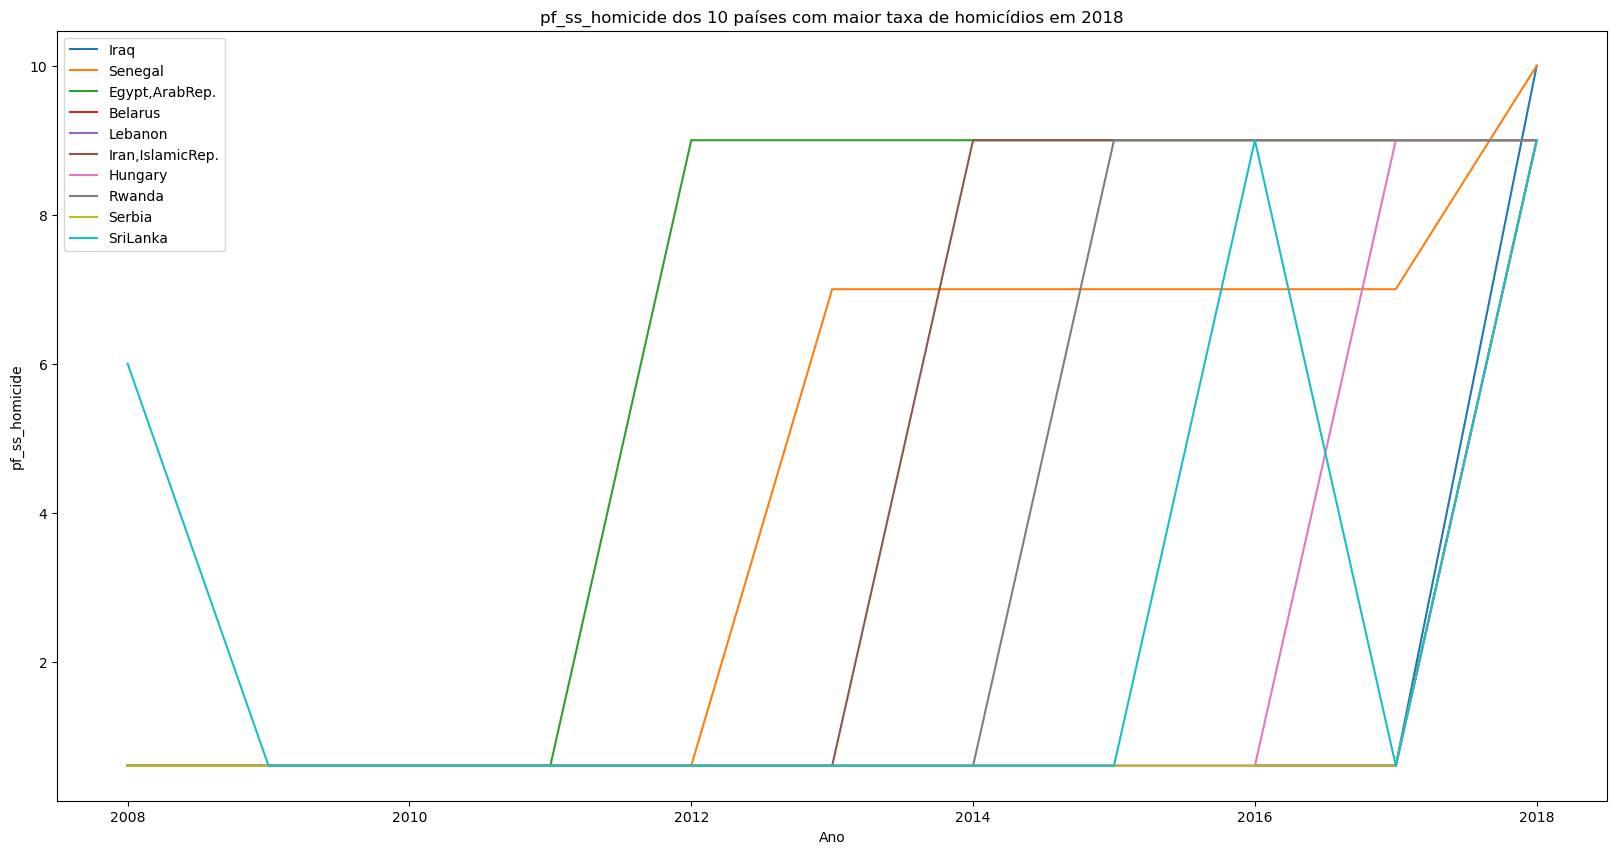

In [ ]:
# Removendo dados não núméricos pf_ss_homicide e substituindo pela média
df_hf['pf_ss_homicide'] = df_hf['pf_ss_homicide'].apply(convert_values)

mean = df_hf['pf_ss_homicide'].mean()

df_hf['pf_ss_homicide'] = df_hf['pf_ss_homicide'].replace(0, mean)

# Plot da taxa de homicídios por país ao longo do tempo dos 10 países com maior taxa de homicídios em 2018
plt.figure(figsize=(20,10))
for country in df_hf[df_hf['year'] == 2018].sort_values(by=['pf_ss_homicide'], ascending=False).head(10)['countries']:
    plt.plot(df_hf[df_hf['countries'] == country]['year'], df_hf[df_hf['countries'] == country]['pf_ss_homicide'], label=country)
plt.xlabel('Ano')
plt.ylabel('pf_ss_homicide')
plt.title('pf_ss_homicide dos 10 países com maior taxa de homicídios em 2018')
plt.legend()
plt.show()


# Questão 16
Qual foi o impacto das eleições americanas de 2016 no ranking de liberdade do país? Explique;

Resposta: Observando os dados, observa-se uma diminuição no ranking de liberadade. Contudo, nota-se que este decrescimento já vinha ocorrendo desde o fim da década de 2000, o que indica que a eleição de 2016 não foi o único fator que influenciou na queda do ranking de liberdade dos EUA.

In [ ]:
df_hf[df_hf['ISO_code'] == 'USA']

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
1705,2018,USA,UnitedStates,North America,8.44,17.0,1.0,2021-07-07 00:00:00,2021-02-06 00:00:00,2021-03-06 00:00:00,...,8.0,2021-09-09 00:00:00,2021-01-09 00:00:00,2021-06-09 00:00:00,8.0,2021-04-08 00:00:00,2021-08-08 00:00:00,8.22,6.0,10.0
1706,2017,USA,UnitedStates,North America,8.55,8.0,1.0,2021-07-07 00:00:00,2021-04-06 00:00:00,2021-03-06 00:00:00,...,2021-02-08 00:00:00,2021-08-09 00:00:00,9.0,2021-06-09 00:00:00,8.0,2021-05-08 00:00:00,9.0,8.34,5.0,10.0
1707,2016,USA,UnitedStates,North America,8.52,14.0,1.0,2021-06-07 00:00:00,2021-07-06 00:00:00,2021-05-06 00:00:00,...,8.0,2021-08-09 00:00:00,2021-02-09 00:00:00,2021-06-09 00:00:00,8.0,2021-05-08 00:00:00,9.0,8.32,5.0,10.0
1708,2015,USA,UnitedStates,North America,8.54,13.0,1.0,2021-06-07 00:00:00,2021-07-06 00:00:00,2021-05-06 00:00:00,...,2021-06-07 00:00:00,2021-08-09 00:00:00,2021-06-09 00:00:00,2021-06-09 00:00:00,8.0,2021-03-08 00:00:00,2021-09-08 00:00:00,8.27,6.0,10.0
1709,2014,USA,UnitedStates,North America,8.51,15.0,1.0,2021-01-08 00:00:00,2021-05-06 00:00:00,2021-08-06 00:00:00,...,8.0,2021-08-09 00:00:00,2021-08-09 00:00:00,2021-06-09 00:00:00,8.0,2021-03-08 00:00:00,2021-08-08 00:00:00,8.16,8.0,10.0
1710,2013,USA,UnitedStates,North America,8.44,17.0,1.0,2021-01-07 00:00:00,2021-07-06 00:00:00,2021-04-06 00:00:00,...,8.0,2021-08-09 00:00:00,2021-08-09 00:00:00,2021-06-09 00:00:00,8.0,2021-02-08 00:00:00,2021-08-08 00:00:00,2021-07-08 00:00:00,8.0,10.0
1711,2012,USA,UnitedStates,North America,8.47,13.0,1.0,2021-08-06 00:00:00,2021-01-06 00:00:00,2021-05-06 00:00:00,...,8.0,2021-08-09 00:00:00,10.0,2021-04-09 00:00:00,8.0,2021-02-08 00:00:00,2021-06-08 00:00:00,8.15,6.0,9.86
1712,2011,USA,UnitedStates,North America,8.39,17.0,1.0,2021-03-07 00:00:00,2021-05-06 00:00:00,2021-05-06 00:00:00,...,2021-09-07 00:00:00,2021-08-09 00:00:00,10.0,10.0,8.0,2021-03-08 00:00:00,2021-05-08 00:00:00,2021-07-08 00:00:00,7.0,9.86
1713,2010,USA,UnitedStates,North America,8.41,16.0,1.0,2021-03-07 00:00:00,2021-05-06 00:00:00,2021-05-06 00:00:00,...,2021-09-07 00:00:00,2021-08-09 00:00:00,10.0,10.0,2021-09-07 00:00:00,2021-03-08 00:00:00,2021-04-08 00:00:00,2021-12-08 00:00:00,6.0,9.86
1714,2009,USA,UnitedStates,North America,8.37,17.0,1.0,2021-03-07 00:00:00,2021-05-06 00:00:00,2021-05-06 00:00:00,...,7.0,2021-08-09 00:00:00,10.0,10.0,2021-09-07 00:00:00,2021-01-08 00:00:00,2021-03-08 00:00:00,2021-03-08 00:00:00,7.0,9.86


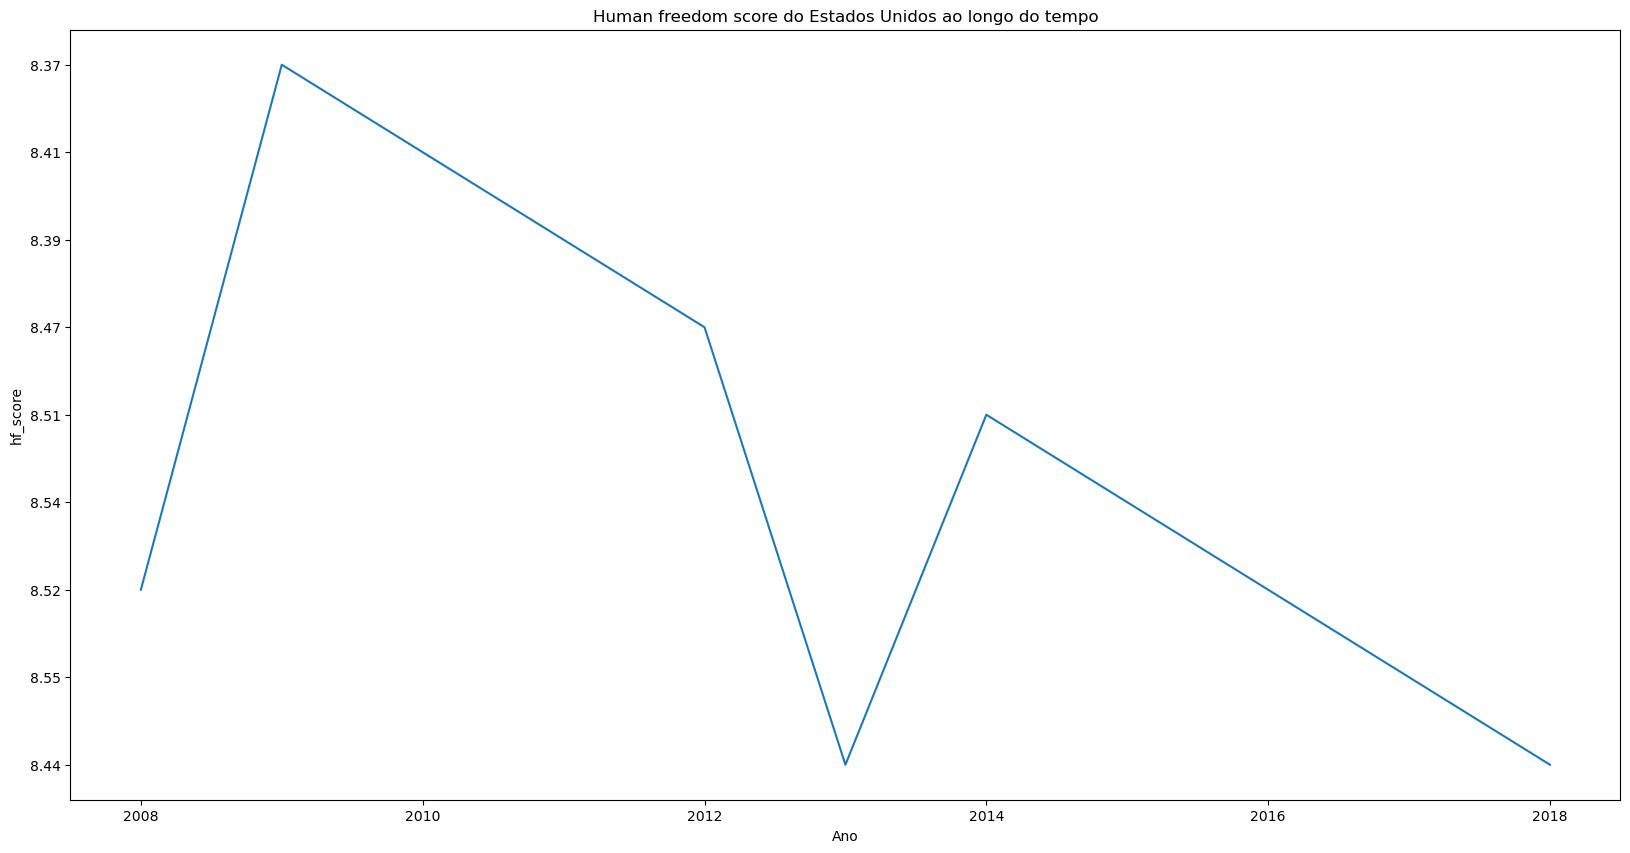

In [ ]:
# Plot da human_freedom score do Estados Unidos ao longo do tempo
plt.figure(figsize=(20,10))
plt.plot(df_hf[df_hf['countries'] == 'UnitedStates']['year'], df_hf[df_hf['countries'] == 'UnitedStates']['hf_score'])
plt.xlabel('Ano')
plt.ylabel('hf_score')
plt.title('Human freedom score do Estados Unidos ao longo do tempo')
plt.show()

# Questão 17
É possível observar correlação forte entre a população de um país e a colocação dele nas Olimpíadas? Justifique;

Resposta: Observando a matriz de correlação dos dados, observou-se que não há um indicativo de correlação entre os parâmetros.

In [ ]:
medals_df.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total,Rank_Official
0,UnitedStates,39,41,33,113,1,1
1,China,38,32,18,88,2,2
2,Japan,27,14,17,58,5,3
3,UnitedKingdom,22,21,22,65,4,4
4,Russia,20,28,23,71,3,5


In [ ]:
df_geral.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,AmericanSamoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
# Agrupando medals_df[Rank_Official] e df_geral[Population] em um único dataset
df_medals_geral = pd.merge(medals_df[['Country', 'Rank By Total']], df_geral[['Country', 'Population']], left_on='Country', right_on='Country')
df_medals_geral.head()

,Country,Rank By Total,Population
0,UnitedStates,1,298444215
1,China,2,1313973713
2,Japan,5,127463611
3,UnitedKingdom,4,60609153
4,Russia,3,142893540


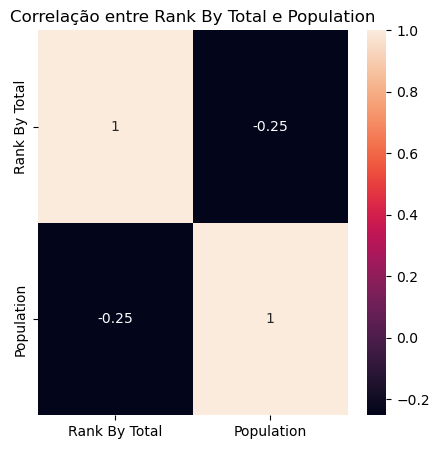

In [ ]:
# plot da correlação entre Rank By Total e Population
plt.figure(figsize=(5,5))
plt.title('Correlação entre Rank By Total e Population')
sns.heatmap(df_medals_geral[['Rank By Total', 'Population']].corr(), annot=True)
plt.show()

# Questão 18
Em quais características o Brasil precisa investir para melhorar sua colocação no ranking olímpico? Encontre a característica mais importante entre todos os datasets;

# Questão 19
Suponha que a economia do país dependa apenas de agricultura e indústria. O fato de um país ser litorâneo faz com que ele aposte mais na agricultura do que na indústria? Explique;

Resposta: Observando os dados e gráficos, obsevou-se que, pelo contrário da questão, há um indicativo de que países mais litorâneos tendem a investir mais na indústria do que na agricultura.

In [ ]:
df_geral.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,AmericanSamoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


       Agriculture    Industry
count   170.000000  169.000000
mean      0.130471    0.283621
std       0.136758    0.146687
min       0.000000    0.020000
25%       0.033500    0.188000
50%       0.085500    0.272000
75%       0.175750    0.340000
max       0.769000    0.906000


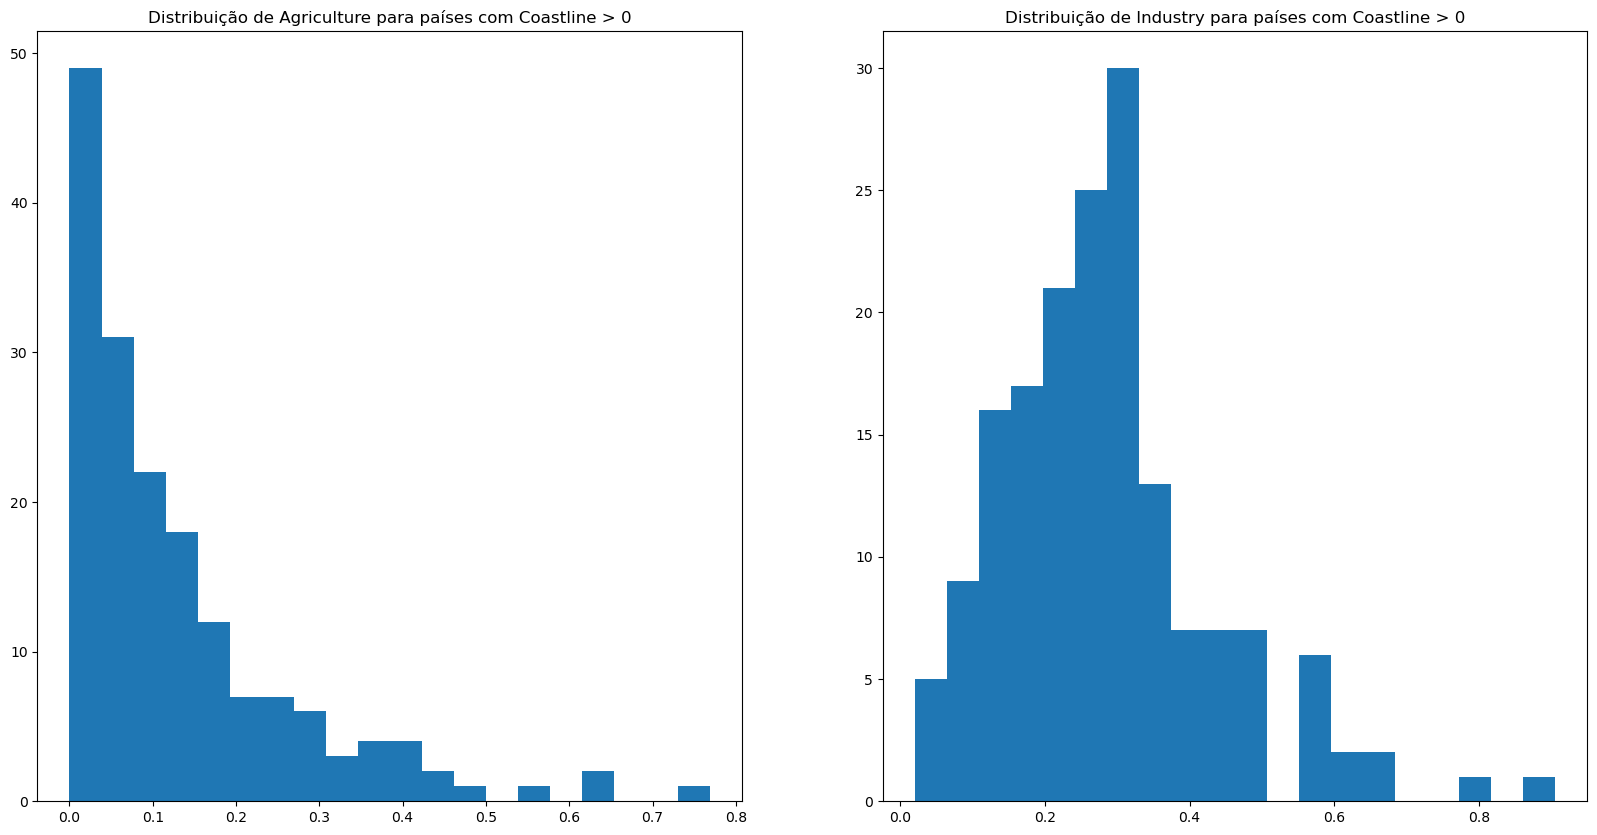

In [ ]:
print(df_geral[df_geral['Coastline (coast/area ratio)'] > 0][['Agriculture', 'Industry']].describe())


# Plot da distribuição de Agriculture e Industry para países com Coastline > 0 e Coastline = 0
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(df_geral[df_geral['Coastline (coast/area ratio)'] > 0]['Agriculture'], bins=20)
plt.title('Distribuição de Agriculture para países com Coastline > 0')
plt.subplot(1,2,2)
plt.hist(df_geral[df_geral['Coastline (coast/area ratio)'] > 0]['Industry'], bins=20)
plt.title('Distribuição de Industry para países com Coastline > 0')
plt.show()


# Questão 20
Obtenha o ranking das regiões com maior número médio de medalhas.

In [ ]:
# Agrupando df_geral[Country, Region] e medals_df[Country, Total] em um único dataset
df_medals_geral_region = pd.merge(df_geral[['Country', 'Region']], medals_df[['Country', 'Total']], left_on='Country', right_on='Country')
df_medals_geral_region.head()

# Tirando a média de medalhas por região e ordenando pelo valor decrescente
df_medals_geral_region.groupby('Region').mean().sort_values(by=['Total'], ascending=False)

C:\Users\hugos\AppData\Local\Temp\ipykernel_28364\2388192760.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_medals_geral_region.groupby('Region').mean().sort_values(by=['Total'], ascending=False)


,Total
Region,
NORTHERN AMERICA,46.000000
OCEANIA,22.666667
ASIA (EX. NEAR EAST),19.222222
WESTERN EUROPE,17.647059
C.W. OF IND. STATES,13.300000
EASTERN EUROPE,9.000000
LATIN AMER. & CARIB,6.454545
NEAR EAST,3.571429
NORTHERN AFRICA,3.000000
